## Collatz binary notebook

In [1]:
"""
This experimental notebook analyses collatz sequences from a binary perspective.
"""

# Fix possible import problems
import sys
sys.path.append("..")

# Imports
import random as rnd
from math import log2
import matplotlib.pyplot as plt
import pandas as pd
from collatz import generator as gen
from collatz import commons as com

# Configuration
MAX_VALUE = 101
K_FACTOR = 3
MAX_ITERATIONS = 600
PRINT_TABLE = True

START_VALUE = rnd.randint(1, MAX_VALUE)

if START_VALUE % 2 == 0:
    START_VALUE = START_VALUE + 1

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Create a collatz sequence and analyse it
analysis_frame = gen.generate_collatz_sequence(
    start_value=START_VALUE, k=K_FACTOR, max_iterations=MAX_ITERATIONS)

# Derive new fields
analysis_frame["v1"] = START_VALUE
analysis_frame["bin_str"] = analysis_frame["collatz"].apply(com.to_binary)
analysis_frame["bin_len"] = analysis_frame["bin_str"].apply(len)
analysis_frame["log2_xi"] = analysis_frame["collatz"].apply(log2)

prev_bin_len = list(analysis_frame[:-1]["bin_len"])
prev_bin_len.insert(0, prev_bin_len[0])
analysis_frame["bin_diff"] = analysis_frame["bin_len"] - pd.Series(prev_bin_len)

# Print data
print_frame = analysis_frame[[
    "v1", "collatz", "odd", "bin_len", "bin_str", "log2_xi", "bin_diff"]]

print_frame.columns = [
    "v1", "xi", "odd", "bin_len", "bin_str", "log2_xi", "bin_diff"]

print("Start value:", START_VALUE, 
      " K:", K_FACTOR, 
      "\n")

if PRINT_TABLE:
    print(print_frame.to_string(index=False), "\n")


Start value: 67  K: 3 

 v1   xi  odd  bin_len    bin_str   log2_xi  bin_diff
 67   67    1        7    1000011  6.066089         0
 67  202    0        8   11001010  7.658211         1
 67  101    1        7    1100101  6.658211        -1
 67  304    0        9  100110000  8.247928         2
 67  152    0        8   10011000  7.247928        -1
 67   76    0        7    1001100  6.247928        -1
 67   38    0        6     100110  5.247928        -1
 67   19    1        5      10011  4.247928        -1
 67   58    0        6     111010  5.857981         1
 67   29    1        5      11101  4.857981        -1
 67   88    0        7    1011000  6.459432         2
 67   44    0        6     101100  5.459432        -1
 67   22    0        5      10110  4.459432        -1
 67   11    1        4       1011  3.459432        -1
 67   34    0        6     100010  5.087463         2
 67   17    1        5      10001  4.087463        -1
 67   52    0        6     110100  5.700440         1
 67 

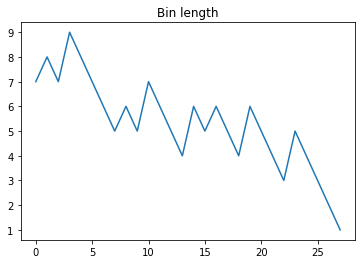

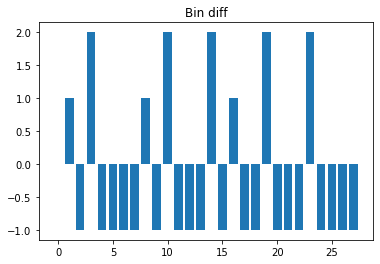

In [2]:
plt.figure()
plt.title("Bin length")
plt.plot(analysis_frame["bin_len"], "-")

plt.figure()
plt.title("Bin diff")
plt.bar(analysis_frame.index, analysis_frame["bin_diff"])

plt.show()